In [18]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

In [19]:
df = pd.read_csv('./대학원/데이터/정리 데이터/공공자전거 대여이력/공공자전거 대여이력_2021.05.csv', engine = 'python')
df

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-51372,2021-04-30 23:13:46,605,신설동역8번출구,0,2021-05-01 00:00:03,4710,자교교회 앞,0,46,6234.92
1,SPB-51159,2021-04-30 23:52:51,2277,길마중4교 하부,0,2021-05-01 00:00:04,2525,반포쇼핑타운 2동 앞,0,7,1660.90
2,SPB-32374,2021-04-30 23:52:31,703,오목교역 7번출구 앞,0,2021-05-01 00:00:04,796,목동아파트 14단지 B상가 앞,0,7,1377.78
3,SPB-39733,2021-04-30 23:50:46,1721,창동역 2번출구,0,2021-05-01 00:00:05,1690,도봉운전면허시험장,0,9,1404.03
4,SPB-81816,2021-04-30 23:51:57,1351,안암2교 옆,99,2021-05-01 00:00:05,378,청계7가 사거리,99,8,1770.00
...,...,...,...,...,...,...,...,...,...,...,...
2935434,SPB-31282,2021-05-31 23:48:22,2190,도원맨션,0,2021-05-31 23:59:57,2102,봉림교 교통섬,0,11,1145.32
2935435,SPB-50316,2021-05-31 23:55:04,1106,신방화사거리,0,2021-05-31 23:59:57,1103,방화역 4번출구앞,0,4,639.19
2935436,SPB-44035,2021-05-31 23:51:12,1627,수락산역 4번출구,0,2021-05-31 23:59:58,1727,서울도봉초등학교인근,0,8,1383.25
2935437,SPB-50409,2021-05-31 23:31:37,1008,암사역 3번출구(국민은행앞),0,2021-05-31 23:59:58,544,광남중학교,0,28,3234.21


In [20]:
df.isnull().sum()

자전거번호      0
대여일시       0
대여대여소번호    0
대여대여소명     0
대여거치대      0
반납일시       0
반납대여소번호    0
반납대여소명     0
반납거치대      0
이용시간       0
이용거리       0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935439 entries, 0 to 2935438
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   자전거번호    object 
 1   대여일시     object 
 2   대여대여소번호  int64  
 3   대여대여소명   object 
 4   대여거치대    int64  
 5   반납일시     object 
 6   반납대여소번호  int64  
 7   반납대여소명   object 
 8   반납거치대    int64  
 9   이용시간     int64  
 10  이용거리     float64
dtypes: float64(1), int64(5), object(5)
memory usage: 246.4+ MB


In [22]:
df.describe()

,대여대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리
count,2.935439e+06,2.935439e+06,2.935439e+06,2.935439e+06,2.935439e+06,2.935439e+06
mean,1.634957e+03,2.965392e+00,1.632153e+03,2.961266e+00,2.794215e+01,3.264668e+03
std,1.195525e+03,1.684300e+01,1.191317e+03,1.683156e+01,2.960565e+01,3.882321e+03
min,3.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,6.540000e+02,0.000000e+00,6.600000e+02,0.000000e+00,8.000000e+00,9.230400e+02
50%,1.333000e+03,0.000000e+00,1.332000e+03,0.000000e+00,1.700000e+01,1.890000e+03
75%,2.317000e+03,0.000000e+00,2.306000e+03,0.000000e+00,3.900000e+01,4.067360e+03
max,9.999000e+03,9.900000e+01,9.999000e+03,9.900000e+01,1.347000e+03,9.722645e+04


In [23]:
df = df.drop(['자전거번호', '대여대여소번호', '대여거치대', '반납대여소번호', '반납거치대', '이용시간', '이용거리'], axis = 1)
df.head()

,대여일시,대여대여소명,반납일시,반납대여소명
0,2021-04-30 23:13:46,신설동역8번출구,2021-05-01 00:00:03,자교교회 앞
1,2021-04-30 23:52:51,길마중4교 하부,2021-05-01 00:00:04,반포쇼핑타운 2동 앞
2,2021-04-30 23:52:31,오목교역 7번출구 앞,2021-05-01 00:00:04,목동아파트 14단지 B상가 앞
3,2021-04-30 23:50:46,창동역 2번출구,2021-05-01 00:00:05,도봉운전면허시험장
4,2021-04-30 23:51:57,안암2교 옆,2021-05-01 00:00:05,청계7가 사거리


In [24]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])

In [25]:
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여요일'] = df['대여일시'].dt.dayofweek
df['대여시간'] = df['대여일시'].dt.hour
df['대여시간_분'] = df['대여일시'].dt.minute

df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납요일'] = df['반납일시'].dt.dayofweek
df['반납시간'] = df['반납일시'].dt.hour
df['반납시간_분'] = df['반납일시'].dt.minute

In [26]:
df = df.sort_values('대여일시', ignore_index = True)
df.head()

,대여일시,대여대여소명,반납일시,반납대여소명,대여월,대여일,대여요일,대여시간,대여시간_분,반납월,반납일,반납요일,반납시간,반납시간_분
0,2021-04-30 12:18:15,광흥창역5번출구,2021-05-01 08:45:32,광흥창역5번출구,4,30,4,12,18,5,1,5,8,45
1,2021-04-30 17:19:11,창원초등학교 교차로,2021-05-01 01:37:26,창원초등학교 교차로,4,30,4,17,19,5,1,5,1,37
2,2021-04-30 18:32:00,북가좌1동 주민센터,2021-05-01 08:30:34,새절역 2번출구,4,30,4,18,32,5,1,5,8,30
3,2021-04-30 20:14:27,신방화역환승주차장,2021-05-01 00:18:00,가양역 8번출구,4,30,4,20,14,5,1,5,0,18
4,2021-04-30 20:32:18,과기대 입구(우),2021-05-01 00:04:31,(구)신한은행 중랑교지점,4,30,4,20,32,5,1,5,0,4


- 대여일시 기준으로 5월인 것부터 분석할 것이므로 대여월이 4인 것은 삭제

In [27]:
df = df[df['대여월'] != 4]
df = df[df['반납월'] != 6]
df.head()

,대여일시,대여대여소명,반납일시,반납대여소명,대여월,대여일,대여요일,대여시간,대여시간_분,반납월,반납일,반납요일,반납시간,반납시간_분
1079,2021-05-01 00:00:01,리버뷰신안인스빌2차 후문,2021-05-01 00:41:19,대학동주민센터,5,1,5,0,0,5,1,5,0,41
1080,2021-05-01 00:00:02,이촌1동 주민센터 뒤,2021-05-01 00:05:47,LIG강촌아파트 103동앞,5,1,5,0,0,5,1,5,0,5
1081,2021-05-01 00:00:04,신한은행,2021-05-01 00:05:22,디지털입구 교차로,5,1,5,0,0,5,1,5,0,5
1082,2021-05-01 00:00:10,잠실트리지움310동 옆,2021-05-01 00:06:23,잠실나들목,5,1,5,0,0,5,1,5,0,6
1083,2021-05-01 00:00:13,오류동역 맞은편,2021-05-01 00:44:38,개봉푸르지오아파트 상가,5,1,5,0,0,5,1,5,0,44


In [28]:
df['대여대여소명'] = df['대여대여소명'].astype('category')
df['반납대여소명'] = df['반납대여소명'].astype('category')

# 1. 15분당 자전거 대여수의 평균 = $\mu$
- $\mu$ = 10이면 15분동안 평균 10대의 자전거 대여
# rent_count = b(t) : 관측된 자전거 대여수

In [16]:
df_rental = df[['대여일시', '대여대여소명', '대여월', '대여일', '대여요일', '대여시간', '대여시간_분']]
df_rental.reset_index(drop = True, inplace = True)
df_rental.head()

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분
0,2021-05-01 00:00:01,리버뷰신안인스빌2차 후문,5,1,5,0,0
1,2021-05-01 00:00:02,이촌1동 주민센터 뒤,5,1,5,0,0
2,2021-05-01 00:00:04,신한은행,5,1,5,0,0
3,2021-05-01 00:00:10,잠실트리지움310동 옆,5,1,5,0,0
4,2021-05-01 00:00:13,오류동역 맞은편,5,1,5,0,0


- 현대고등학교 건너편 대여소 번호 = 2301

In [17]:
df_rental = df_rental[df_rental['대여대여소명'] == '현대고등학교 건너편']
df_rental.reset_index(drop = True, inplace = True)
df_rental.head()

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분
0,2021-05-01 00:31:52,현대고등학교 건너편,5,1,5,0,31
1,2021-05-01 02:21:22,현대고등학교 건너편,5,1,5,2,21
2,2021-05-01 03:57:51,현대고등학교 건너편,5,1,5,3,57
3,2021-05-01 03:58:35,현대고등학교 건너편,5,1,5,3,58
4,2021-05-01 04:00:17,현대고등학교 건너편,5,1,5,4,0


In [18]:
df_rental = pd.DataFrame(df_rental.groupby(['대여시간']).size()).sort_index()
df_rental.head()

,0
대여시간,
0,62
1,24
2,25
3,10
4,7


In [19]:
df_rental.reset_index(inplace = True)
df_rental.head()

,대여시간,0
0,0,62
1,1,24
2,2,25
3,3,10
4,4,7


In [20]:
df_rental = df_rental.rename(columns = {0 : 'rent_count'})
df_rental.head()

,대여시간,rent_count
0,0,62
1,1,24
2,2,25
3,3,10
4,4,7


0시-1시에 대여 62번, 1시-2시에 대여 24번

In [21]:
df_rental['rent_count'] = df_rental['rent_count'] / 31
df_rental

,대여시간,rent_count
0,0,2.000000
1,1,0.774194
2,2,0.806452
3,3,0.322581
4,4,0.225806
5,5,0.290323
6,6,0.322581
7,7,0.354839
8,8,0.516129
9,9,1.387097


In [22]:
df_rental['mu_15'] = df_rental['rent_count'] / 4
df_rental

,대여시간,rent_count,mu_15
0,0,2.000000,0.500000
1,1,0.774194,0.193548
2,2,0.806452,0.201613
3,3,0.322581,0.080645
4,4,0.225806,0.056452
5,5,0.290323,0.072581
6,6,0.322581,0.080645
7,7,0.354839,0.088710
8,8,0.516129,0.129032
9,9,1.387097,0.346774


# 2. 평균도착률(15분당 자전거 반납수의 평균) = $\lambda$
- $\lambda$ = 10이면 15분동안 평균 10대의 자전거를 반납
# c: 최대거치용량
# return_count = r(t) : 관측된 자전거 반납수

In [55]:
df_return = df[['반납일시', '반납대여소명', '반납월', '반납일', '반납요일', '반납시간', '반납시간_분']]
df_return.head()

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분
1079,2021-05-01 00:41:19,대학동주민센터,5,1,5,0,41
1080,2021-05-01 00:05:47,LIG강촌아파트 103동앞,5,1,5,0,5
1081,2021-05-01 00:05:22,디지털입구 교차로,5,1,5,0,5
1082,2021-05-01 00:06:23,잠실나들목,5,1,5,0,6
1083,2021-05-01 00:44:38,개봉푸르지오아파트 상가,5,1,5,0,44


In [56]:
df_return = df_return[df_return['반납대여소명'] == 'G유플러스 마곡사옥']
df_return.reset_index(drop = True, inplace = True)
df_return.head()

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분
0,2021-05-01 09:34:26,LG유플러스 마곡사옥,5,1,5,9,34
1,2021-05-01 09:54:22,LG유플러스 마곡사옥,5,1,5,9,54
2,2021-05-01 09:57:24,LG유플러스 마곡사옥,5,1,5,9,57
3,2021-05-01 12:04:44,LG유플러스 마곡사옥,5,1,5,12,4
4,2021-05-01 10:44:50,LG유플러스 마곡사옥,5,1,5,10,44


In [57]:
# 2021년 5월 하루 반납건수 중 이상치를 제외한 가장 큰 수(=upper bound)를 최대 거치 용량으로 설정

df_c = pd.DataFrame(df_return.groupby(['반납일', '반납시간']).size()).sort_index()
df_c.reset_index(inplace = True)
df_c = df_c.rename(columns = {0 : 'return_count'})

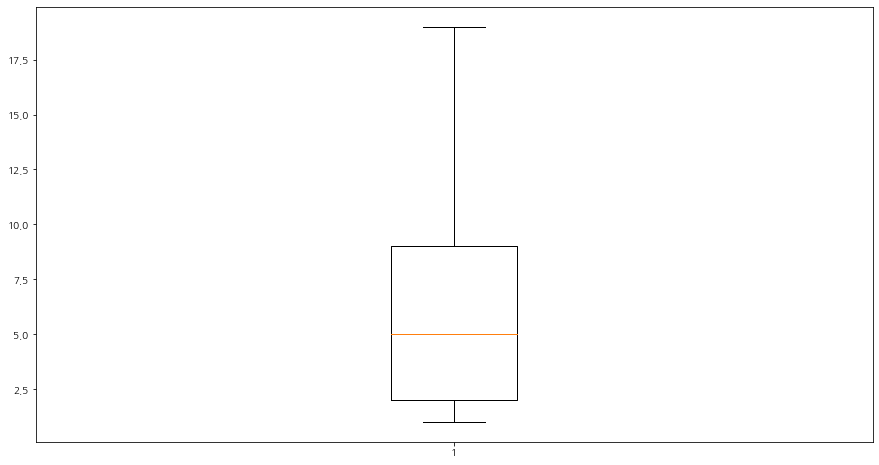

In [58]:
plt.figure(figsize = (15, 8))
plt.boxplot(df_c['return_count'], showfliers = False)     # 아웃라이어 제거
plt.show()

In [59]:
q1, q3 = np.percentile(df_c['return_count'], [25, 75])
iqr = q3 - q1
upper_bound = q3 + (iqr * 1.5)
c = upper_bound
c

19.5

In [44]:
df_return = pd.DataFrame(df_return.groupby(['반납시간']).size()).sort_index()
df_return.head()

,0
반납시간,
0,78
1,37
2,25
3,19
4,6


In [45]:
df_return.reset_index(inplace = True)
df_return.head()

,반납시간,0
0,0,78
1,1,37
2,2,25
3,3,19
4,4,6


In [46]:
df_return = df_return.rename(columns = {0 : 'return_count'})
df_return.head()

,반납시간,return_count
0,0,78
1,1,37
2,2,25
3,3,19
4,4,6


0시-1시에 반납 78번, 1시-2시에 반납 37번

In [47]:
df_return['return_count'] = df_return['return_count'] / 31
df_return.head()

,반납시간,return_count
0,0,2.516129
1,1,1.193548
2,2,0.806452
3,3,0.612903
4,4,0.193548


In [48]:
df_return['lambda_15'] = df_return['return_count'] / 4
df_return.head()

,반납시간,return_count,lambda_15
0,0,2.516129,0.629032
1,1,1.193548,0.298387
2,2,0.806452,0.201613
3,3,0.612903,0.153226
4,4,0.193548,0.048387


# 3. censored demand 고려하지 않은 service level

In [49]:
df_rental

,대여시간,rent_count,mu_15
0,0,2.000000,0.500000
1,1,0.774194,0.193548
2,2,0.806452,0.201613
3,3,0.322581,0.080645
4,4,0.225806,0.056452
5,5,0.290323,0.072581
6,6,0.322581,0.080645
7,7,0.354839,0.088710
8,8,0.516129,0.129032
9,9,1.387097,0.346774


In [50]:
df_return

,반납시간,return_count,lambda_15
0,0,2.516129,0.629032
1,1,1.193548,0.298387
2,2,0.806452,0.201613
3,3,0.612903,0.153226
4,4,0.193548,0.048387
5,5,0.064516,0.016129
6,6,0.225806,0.056452
7,7,0.645161,0.161290
8,8,1.354839,0.338710
9,9,2.096774,0.524194


In [51]:
df_return = df_return.rename(columns = {'반납시간' : '대여시간'})
df_return.head()

,대여시간,return_count,lambda_15
0,0,2.516129,0.629032
1,1,1.193548,0.298387
2,2,0.806452,0.201613
3,3,0.612903,0.153226
4,4,0.193548,0.048387


In [52]:
df = pd.merge(left = df_rental, right = df_return, how = 'left', left_on = ['대여시간'], right_on = ['대여시간'])
df

,대여시간,rent_count,mu_15,return_count,lambda_15
0,0,2.000000,0.500000,2.516129,0.629032
1,1,0.774194,0.193548,1.193548,0.298387
2,2,0.806452,0.201613,0.806452,0.201613
3,3,0.322581,0.080645,0.612903,0.153226
4,4,0.225806,0.056452,0.193548,0.048387
5,5,0.290323,0.072581,0.064516,0.016129
6,6,0.322581,0.080645,0.225806,0.056452
7,7,0.354839,0.088710,0.645161,0.161290
8,8,0.516129,0.129032,1.354839,0.338710
9,9,1.387097,0.346774,2.096774,0.524194


## 3.1 서비스레벨을 만족하는 자전거 수의 하한
- 0시 - 1시 사이를 계산하려면
- 0시에 자전거 수가 s이고 1시에 자전거수가 0일 확률 / 0시에 자전거 수가 s일 확률 부터 계산
- 0시에 자전거 수가 s일 확률은 $ p = \rho^s * \frac{1-\rho}{1-(\rho)^(c+1)}$

In [53]:
df['rho'] = df['lambda_15']/df['mu_15']
df

,대여시간,rent_count,mu_15,return_count,lambda_15,rho
0,0,2.000000,0.500000,2.516129,0.629032,1.258065
1,1,0.774194,0.193548,1.193548,0.298387,1.541667
2,2,0.806452,0.201613,0.806452,0.201613,1.000000
3,3,0.322581,0.080645,0.612903,0.153226,1.900000
4,4,0.225806,0.056452,0.193548,0.048387,0.857143
5,5,0.290323,0.072581,0.064516,0.016129,0.222222
6,6,0.322581,0.080645,0.225806,0.056452,0.700000
7,7,0.354839,0.088710,0.645161,0.161290,1.818182
8,8,0.516129,0.129032,1.354839,0.338710,2.625000
9,9,1.387097,0.346774,2.096774,0.524194,1.511628


In [32]:
# t시에 자전거수가 0일 확률

df['s_0'] = df['rho']**0 * (1 - df['rho']) / (1 - df['rho']**(c+1))
df

,대여시간,rent_count,mu_15,return_count,lambda_15,rho,s_0
0,0,62,15.50,78,19.50,1.258065,4.284797e-08
1,1,24,6.00,37,9.25,1.541667,8.920297e-14
2,2,25,6.25,25,6.25,1.000000,NaN
3,3,10,2.50,19,4.75,1.900000,9.976947e-20
4,4,7,1.75,6,1.50,0.857143,1.428611e-01
5,5,9,2.25,2,0.50,0.222222,7.777778e-01
6,6,10,2.50,7,1.75,0.700000,3.000000e-01
7,7,11,2.75,20,5.00,1.818182,1.809309e-18
8,8,16,4.00,42,10.50,2.625000,5.129328e-29
9,9,43,10.75,65,16.25,1.511628,3.211448e-13


In [33]:
df = df.fillna(0)
df.head()

,대여시간,rent_count,mu_15,return_count,lambda_15,rho,s_0
0,0,62,15.50,78,19.50,1.258065,4.284797e-08
1,1,24,6.00,37,9.25,1.541667,8.920297e-14
2,2,25,6.25,25,6.25,1.000000,0.000000e+00
3,3,10,2.50,19,4.75,1.900000,9.976947e-20
4,4,7,1.75,6,1.50,0.857143,1.428611e-01


In [34]:
# t시에 자전거수가 1일 확률

df['s_1'] = df['rho']**1 * (1 - df['rho']) / (1 - df['rho']**(c+1))
df

,대여시간,rent_count,mu_15,return_count,lambda_15,rho,s_0,s_1
0,0,62,15.50,78,19.50,1.258065,4.284797e-08,5.390551e-08
1,1,24,6.00,37,9.25,1.541667,8.920297e-14,1.375212e-13
2,2,25,6.25,25,6.25,1.000000,0.000000e+00,NaN
3,3,10,2.50,19,4.75,1.900000,9.976947e-20,1.895620e-19
4,4,7,1.75,6,1.50,0.857143,1.428611e-01,1.224524e-01
5,5,9,2.25,2,0.50,0.222222,7.777778e-01,1.728395e-01
6,6,10,2.50,7,1.75,0.700000,3.000000e-01,2.100000e-01
7,7,11,2.75,20,5.00,1.818182,1.809309e-18,3.289652e-18
8,8,16,4.00,42,10.50,2.625000,5.129328e-29,1.346448e-28
9,9,43,10.75,65,16.25,1.511628,3.211448e-13,4.854515e-13


In [35]:
df = df.fillna(0)
df.head()

,대여시간,rent_count,mu_15,return_count,lambda_15,rho,s_0,s_1
0,0,62,15.50,78,19.50,1.258065,4.284797e-08,5.390551e-08
1,1,24,6.00,37,9.25,1.541667,8.920297e-14,1.375212e-13
2,2,25,6.25,25,6.25,1.000000,0.000000e+00,0.000000e+00
3,3,10,2.50,19,4.75,1.900000,9.976947e-20,1.895620e-19
4,4,7,1.75,6,1.50,0.857143,1.428611e-01,1.224524e-01


In [36]:
df['s_min'] = 1 - df['mu_15'] * df['s_1'] + df['lambda_15'] * df['s_0']
df

,대여시간,rent_count,mu_15,return_count,lambda_15,rho,s_0,s_1,s_min
0,0,62,15.50,78,19.50,1.258065,4.284797e-08,5.390551e-08,1.0
1,1,24,6.00,37,9.25,1.541667,8.920297e-14,1.375212e-13,1.0
2,2,25,6.25,25,6.25,1.000000,0.000000e+00,0.000000e+00,1.0
3,3,10,2.50,19,4.75,1.900000,9.976947e-20,1.895620e-19,1.0
4,4,7,1.75,6,1.50,0.857143,1.428611e-01,1.224524e-01,1.0
5,5,9,2.25,2,0.50,0.222222,7.777778e-01,1.728395e-01,1.0
6,6,10,2.50,7,1.75,0.700000,3.000000e-01,2.100000e-01,1.0
7,7,11,2.75,20,5.00,1.818182,1.809309e-18,3.289652e-18,1.0
8,8,16,4.00,42,10.50,2.625000,5.129328e-29,1.346448e-28,1.0
9,9,43,10.75,65,16.25,1.511628,3.211448e-13,4.854515e-13,1.0


In [37]:
# t시에 자전거수가 c일 확률

df['s_c'] = df['rho']**c * (1 - df['rho']) / (1 - df['rho']**(c+1))
df

,대여시간,rent_count,mu_15,return_count,lambda_15,rho,s_0,s_1,s_min,s_c
0,0,62,15.50,78,19.50,1.258065,4.284797e-08,5.390551e-08,1.0,2.051282e-01
1,1,24,6.00,37,9.25,1.541667,8.920297e-14,1.375212e-13,1.0,3.513514e-01
2,2,25,6.25,25,6.25,1.000000,0.000000e+00,0.000000e+00,1.0,NaN
3,3,10,2.50,19,4.75,1.900000,9.976947e-20,1.895620e-19,1.0,4.736842e-01
4,4,7,1.75,6,1.50,0.857143,1.428611e-01,1.224524e-01,1.0,4.671746e-06
5,5,9,2.25,2,0.50,0.222222,7.777778e-01,1.728395e-01,1.0,1.335418e-44
6,6,10,2.50,7,1.75,0.700000,3.000000e-01,2.100000e-01,1.0,1.255134e-11
7,7,11,2.75,20,5.00,1.818182,1.809309e-18,3.289652e-18,1.0,4.500000e-01
8,8,16,4.00,42,10.50,2.625000,5.129328e-29,1.346448e-28,1.0,6.190476e-01
9,9,43,10.75,65,16.25,1.511628,3.211448e-13,4.854515e-13,1.0,3.384615e-01


In [38]:
df = df.fillna(0)
df.head()

,대여시간,rent_count,mu_15,return_count,lambda_15,rho,s_0,s_1,s_min,s_c
0,0,62,15.50,78,19.50,1.258065,4.284797e-08,5.390551e-08,1.0,0.205128
1,1,24,6.00,37,9.25,1.541667,8.920297e-14,1.375212e-13,1.0,0.351351
2,2,25,6.25,25,6.25,1.000000,0.000000e+00,0.000000e+00,1.0,0.000000
3,3,10,2.50,19,4.75,1.900000,9.976947e-20,1.895620e-19,1.0,0.473684
4,4,7,1.75,6,1.50,0.857143,1.428611e-01,1.224524e-01,1.0,0.000005


In [39]:
# t시에 자전거수가 c-1일 확률

df['s_c_1'] = df['rho']**(c-1) * (1 - df['rho']) / (1 - df['rho']**(c+1))
df

,대여시간,rent_count,mu_15,return_count,lambda_15,rho,s_0,s_1,s_min,s_c,s_c_1
0,0,62,15.50,78,19.50,1.258065,4.284797e-08,5.390551e-08,1.0,2.051282e-01,1.630507e-01
1,1,24,6.00,37,9.25,1.541667,8.920297e-14,1.375212e-13,1.0,3.513514e-01,2.279036e-01
2,2,25,6.25,25,6.25,1.000000,0.000000e+00,0.000000e+00,1.0,0.000000e+00,NaN
3,3,10,2.50,19,4.75,1.900000,9.976947e-20,1.895620e-19,1.0,4.736842e-01,2.493075e-01
4,4,7,1.75,6,1.50,0.857143,1.428611e-01,1.224524e-01,1.0,4.671746e-06,5.450370e-06
5,5,9,2.25,2,0.50,0.222222,7.777778e-01,1.728395e-01,1.0,1.335418e-44,6.009379e-44
6,6,10,2.50,7,1.75,0.700000,3.000000e-01,2.100000e-01,1.0,1.255134e-11,1.793048e-11
7,7,11,2.75,20,5.00,1.818182,1.809309e-18,3.289652e-18,1.0,4.500000e-01,2.475000e-01
8,8,16,4.00,42,10.50,2.625000,5.129328e-29,1.346448e-28,1.0,6.190476e-01,2.358277e-01
9,9,43,10.75,65,16.25,1.511628,3.211448e-13,4.854515e-13,1.0,3.384615e-01,2.239053e-01


In [40]:
df = df.fillna(0)
df.head()

,대여시간,rent_count,mu_15,return_count,lambda_15,rho,s_0,s_1,s_min,s_c,s_c_1
0,0,62,15.50,78,19.50,1.258065,4.284797e-08,5.390551e-08,1.0,0.205128,0.163051
1,1,24,6.00,37,9.25,1.541667,8.920297e-14,1.375212e-13,1.0,0.351351,0.227904
2,2,25,6.25,25,6.25,1.000000,0.000000e+00,0.000000e+00,1.0,0.000000,0.000000
3,3,10,2.50,19,4.75,1.900000,9.976947e-20,1.895620e-19,1.0,0.473684,0.249307
4,4,7,1.75,6,1.50,0.857143,1.428611e-01,1.224524e-01,1.0,0.000005,0.000005


In [41]:
df['s_max'] = 1 - df['lambda_15'] * df['s_c_1'] + df['mu_15'] * df['s_c']
df

,대여시간,rent_count,mu_15,return_count,lambda_15,rho,s_0,s_1,s_min,s_c,s_c_1,s_max
0,0,62,15.50,78,19.50,1.258065,4.284797e-08,5.390551e-08,1.0,2.051282e-01,1.630507e-01,1.0
1,1,24,6.00,37,9.25,1.541667,8.920297e-14,1.375212e-13,1.0,3.513514e-01,2.279036e-01,1.0
2,2,25,6.25,25,6.25,1.000000,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,1.0
3,3,10,2.50,19,4.75,1.900000,9.976947e-20,1.895620e-19,1.0,4.736842e-01,2.493075e-01,1.0
4,4,7,1.75,6,1.50,0.857143,1.428611e-01,1.224524e-01,1.0,4.671746e-06,5.450370e-06,1.0
5,5,9,2.25,2,0.50,0.222222,7.777778e-01,1.728395e-01,1.0,1.335418e-44,6.009379e-44,1.0
6,6,10,2.50,7,1.75,0.700000,3.000000e-01,2.100000e-01,1.0,1.255134e-11,1.793048e-11,1.0
7,7,11,2.75,20,5.00,1.818182,1.809309e-18,3.289652e-18,1.0,4.500000e-01,2.475000e-01,1.0
8,8,16,4.00,42,10.50,2.625000,5.129328e-29,1.346448e-28,1.0,6.190476e-01,2.358277e-01,1.0
9,9,43,10.75,65,16.25,1.511628,3.211448e-13,4.854515e-13,1.0,3.384615e-01,2.239053e-01,1.0


# 4. station_count = s(t) = t시간에 대여소에서 이용 가능한 자전거 수
- s(t) = s(t-1) + r(t) - b(t) = station_count
- s(t) > 0일때만 따로 추출
- 이 t시간의 b(t)들 다 더해서 나누기(=평균)하면 = d(t)(센서드 디맨드 포함한 총 대여수)
- 이 d(t)를 이용해 뮤 다시 계산

- 매일 아침 8시 기준으로 일별 대여소별 자전거 거치수량 나와 있음

In [42]:
data = pd.read_csv('./대학원/데이터/원본 데이터/공공자전거 일별 대여소별 거치수량/일별 대여소별 자전거 거치수량(21년1~5월).csv', engine = 'python')
data

,일시,대여소번호,대여소ID,거치수량
0,2021-01-01 8:00,10,ST-484,204
1,2021-01-01 8:00,11,ST-598,0
2,2021-01-01 8:00,101,ST-3,0
3,2021-01-01 8:00,102,ST-4,2
4,2021-01-01 8:00,103,ST-5,0
...,...,...,...,...
340832,2021-05-31 8:00,4861,ST-2755,4
340833,2021-05-31 8:00,4862,ST-2756,7
340834,2021-05-31 8:00,4863,ST-2728,10
340835,2021-05-31 8:00,9999,ST-1747,11


In [43]:
data = data[data['대여소번호'] == 2301]
data.head()

,일시,대여소번호,대여소ID,거치수량
1597,2021-01-01 8:00,2301,ST-777,2
3725,2021-01-02 8:00,2301,ST-777,3
5853,2021-01-03 8:00,2301,ST-777,2
7981,2021-01-04 8:00,2301,ST-777,1
10109,2021-01-05 8:00,2301,ST-777,1


In [44]:
data['일시'] = pd.to_datetime(data['일시'])
data['월'] = data['일시'].dt.month
data['대여일'] = data['일시'].dt.day
data['대여시간'] = data['일시'].dt.hour
data.head()

,일시,대여소번호,대여소ID,거치수량,월,대여일,대여시간
1597,2021-01-01 08:00:00,2301,ST-777,2,1,1,8
3725,2021-01-02 08:00:00,2301,ST-777,3,1,2,8
5853,2021-01-03 08:00:00,2301,ST-777,2,1,3,8
7981,2021-01-04 08:00:00,2301,ST-777,1,1,4,8
10109,2021-01-05 08:00:00,2301,ST-777,1,1,5,8


In [45]:
data = data.drop(['일시', '대여소번호', '대여소ID'], axis = 1)
data.head()

,거치수량,월,대여일,대여시간
1597,2,1,1,8
3725,3,1,2,8
5853,2,1,3,8
7981,1,1,4,8
10109,1,1,5,8


In [46]:
data = data[['월', '대여일', '대여시간', '거치수량']]
data.head()

,월,대여일,대여시간,거치수량
1597,1,1,8,2
3725,1,2,8,3
5853,1,3,8,2
7981,1,4,8,1
10109,1,5,8,1


In [47]:
data = data[data['월'] == 5]
data.head()

,월,대여일,대여시간,거치수량
269037,5,1,8,10
271388,5,2,8,20
273739,5,3,8,88
276091,5,4,8,6
278443,5,5,8,7


In [48]:
# 매일 아침 8시 기준 거치수량

data.reset_index(drop = True, inplace = True)
data

,월,대여일,대여시간,거치수량
0,5,1,8,10
1,5,2,8,20
2,5,3,8,88
3,5,4,8,6
4,5,5,8,7
5,5,6,8,76
6,5,7,8,2
7,5,8,8,4
8,5,9,8,10
9,5,10,8,44


In [49]:
data = data.drop(['월'], axis = 1)
data.head()

,대여일,대여시간,거치수량
0,1,8,10
1,2,8,20
2,3,8,88
3,4,8,6
4,5,8,7


In [50]:
data = data.rename(columns = {'거치수량' : 'station_count'})
data.head()

,대여일,대여시간,station_count
0,1,8,10
1,2,8,20
2,3,8,88
3,4,8,6
4,5,8,7


In [51]:
df.head()

,대여시간,rent_count,mu_15,return_count,lambda_15,rho,s_0,s_1,s_min,s_c,s_c_1,s_max
0,0,62,15.50,78,19.50,1.258065,4.284797e-08,5.390551e-08,1.0,0.205128,0.163051,1.0
1,1,24,6.00,37,9.25,1.541667,8.920297e-14,1.375212e-13,1.0,0.351351,0.227904,1.0
2,2,25,6.25,25,6.25,1.000000,0.000000e+00,0.000000e+00,1.0,0.000000,0.000000,1.0
3,3,10,2.50,19,4.75,1.900000,9.976947e-20,1.895620e-19,1.0,0.473684,0.249307,1.0
4,4,7,1.75,6,1.50,0.857143,1.428611e-01,1.224524e-01,1.0,0.000005,0.000005,1.0


In [52]:
total = pd.merge(left = df, right = data, how = 'left', left_on = ['대여일', '대여시간'], right_on = ['대여일', '대여시간'])
total.head()

KeyError: '대여일'

In [ ]:
total = total.fillna(0)

In [ ]:
total['station_count'][0] = total['return_count'][0] - total['rent_count'][0]

In [ ]:
# station_count(t) = station_count(t-1) + return_count - rent_count
# 일단 처음 station_count(t-1)을 0으로 가정하고 계산
# 매일 8시 리셋

for i in range(1, len(total)):
    if total['대여시간'][i] != 8:
        total['station_count'][i] = total['station_count'][i - 1] + total['return_count'][i] - total['rent_count'][i]
    else:
        total['station_count'][i] = total['station_count'][i]
total.head(50)

In [ ]:
a = total[total['대여시간'] == 1]
a

In [ ]:
a[a['station_count'] > 0]